# Using Deep Neural Network to classify images

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
mnist_train = pd.read_csv('datasets/mnist/train.csv')
mnist_test = pd.read_csv('datasets/mnist/test.csv')

In [3]:
# 60.000 images with 28 x 28 x 1 in train dataset
# 10.000 images with 28 x 28 x 1 in test dataset

mnist_train.shape, mnist_test.shape

((60000, 785), (10000, 785))

In [4]:
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
first_row = mnist_train[1:2]

In [15]:
first_row

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
first_rows_without_label_column = first_row.drop('label', axis=1)

first_rows_without_label_column

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
image = first_rows_without_label_column.values
image.shape, type(image)

((1, 784), numpy.ndarray)

In [19]:
image = image.reshape(1, 28, 28)
image.shape

(1, 28, 28)

Here is representation of the single image with the channel dimension first; height and width are the remaining two dimension. The squeeze function in a numpy array allows you to quickly eliminate those dimensions which have just single values. So image.squeeze will remove the unwanted one-dimensional access, so that we have an image which is just 28 x 28, and the first dimension has been squeezed.

In [20]:
image = image.squeeze()
image.shape, type(image)

((28, 28), numpy.ndarray)

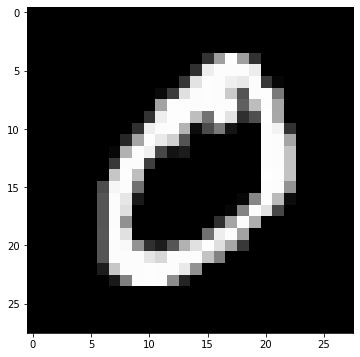

In [47]:
plt.figure(figsize=(6,6))
plt.imshow(image, cmap='gray')
plt.show()

# Begin training model using DNNs

## Data preprocessing

In [23]:
# Dropna drop all columns which has missing value

mnist_train = mnist_train.dropna()
mnist_test = mnist_test.dropna()

In [24]:
mnist_train.shape, mnist_test.shape

((60000, 785), (10000, 785))

In [25]:
mnist_train_features = mnist_train.drop('label', axis=1)
mnist_train_target = mnist_train['label']

In [29]:
print('All images')
print(mnist_train_features)

print('\n')
print('All labels')
print(mnist_train_target)

All images
       1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
0        0    0    0    0    0    0    0    0    0     0  ...      0      0   
1        0    0    0    0    0    0    0    0    0     0  ...      0      0   
2        0    0    0    0    0    0    0    0    0     0  ...      0      0   
3        0    0    0    0    0    0    0    0    0     0  ...      0      0   
4        0    0    0    0    0    0    0    0    0     0  ...      0      0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
59995    0    0    0    0    0    0    0    0    0     0  ...      0      0   
59996    0    0    0    0    0    0    0    0    0     0  ...      0      0   
59997    0    0    0    0    0    0    0    0    0     0  ...      0      0   
59998    0    0    0    0    0    0    0    0    0     0  ...      0      0   
59999    0    0    0    0    0    0    0    0    0     0  ...      0      0   

       28x21  28x22  28x23  28x24  28x25

In [31]:
mnist_test_features = mnist_test.drop('label', axis=1)
mnist_test_target = mnist_test['label']

In [32]:
print('train max - ', mnist_train.values.max())
print('train min - ', mnist_train.values.min())
print('test max - ', mnist_test.values.max())
print('test min - ', mnist_test.values.min())

train max -  255
train min -  0
test max -  255
test min -  0


You can also see that these are integer values representing intensity. It's been empirically shown that machine learning models such as neural network, train and perform **better** when they're dealing with **smaller numbers**, **smaller floating-point numbers**, as opposed to large values. Let's convert all of our data to float32 and divide all of our data by 255 so pixel intensity values are expressed **in the range 0-1**, and we'll do the exact same thing for the test data as well.

In [33]:
mnist_train = mnist_train.astype('float32')
mnist_train = mnist_train / 255

In [34]:
mnist_test = mnist_test.astype('float32')
mnist_test = mnist_test / 255

In [35]:
print('train max - ', mnist_train.values.max())
print('train min - ', mnist_train.values.min())
print('test max - ', mnist_test.values.max())
print('test min - ', mnist_test.values.min())

train max -  1.0
train min -  0.0
test max -  1.0
test min -  0.0


## Train with Pytorch

In [37]:
import torch

In [38]:
x_train_tensor = torch.tensor(mnist_train_features.values, dtype=torch.float)
x_test_tensor = torch.tensor(mnist_test_features.values, dtype=torch.float)

y_train_tensor = torch.tensor(mnist_train_target.values, dtype=torch.long)
y_test_tensor = torch.tensor(mnist_test_target.values, dtype=torch.long)

In [44]:
x_train_tensor.shape, y_train_tensor.shape

(torch.Size([60000, 784]), torch.Size([60000]))

In [45]:
x_test_tensor.shape, y_test_tensor.shape

(torch.Size([10000, 784]), torch.Size([10000]))

There are 60, 000 images, and each image has 784 pixels, and there are 60, 000 corresponding labels as well. When we feed in images to a deep neural network, we'll feed them in as one-dimensional vectors. Deep neural networks do not accept images in the original two-dimensional format with height and width. Let's take a look at our test data. Next there are 10, 000 test images that we'll use to evaluate our model.

In [48]:
# Import torch neural network
import torch.nn as nn

In [49]:
input_size = 784 # Size of an image
output_size = 10 # 10 categories: 0, 1, 2, 3, 4, 5 ,6 7, 8, 9

hidden1_size = 16 # First hidden layer with 16 neurons
hidden2_size = 32 # Second hidden layer with 32 neurons

In [50]:
# class Net inherit from nn.Module

class Net(nn.Module):

    def __init__(self):

        super(Net, self).__init__()
        
        # 3 layers
        self.fc1 = nn.Linear(input_size, hidden1_size) # Input layer
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.fc3 = nn.Linear(hidden2_size, output_size) # Output layer

    # Called in forward pass of neural network
    def forward(self, x):
        
        # Applied sigmoid activation function to our first two layer
        x = torch.sigmoid(self.fc1(x))
        
        # Output of the first layer pass to the second layer
        x = torch.sigmoid(self.fc2(x))

        # Output of the second layer pass to the third layer
        x = self.fc3(x)
        
        # Equivalent to log(softmax()) and used with the NLLLoss function. 
        # More stable numerically and has better performance
        return torch.log_softmax(x, dim=-1)
    

In [62]:
model = Net()

In [63]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [64]:
model.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [65]:
x_train_tensor = x_train_tensor.to(device)
x_test_tensor = x_test_tensor.to(device)

y_train_tensor = y_train_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

In [66]:
# Contains optimizers for training models

import torch.optim as optim

In [67]:
# Computationally efficient optimization algorithm with low memory requirements 
# works well with large datasets

optimizer = optim.Adam(model.parameters())

loss_function = nn.NLLLoss()

We'll now run training for a total of 500 epochs, that is 500 passes through our dataset

In [68]:
epochs = 500

In [69]:
def train_model(num_of_epochs):
    for epoch in range(1, epochs + 1):

        optimizer.zero_grad()
        Y_pred = model(x_train_tensor)

        loss = loss_function(Y_pred, y_train_tensor)
        loss.backward()

        optimizer.step()

        if epoch % 10 == 0:
            print('Epoch - %d, loss - %0.2f ' %(epoch, loss.item()))

In [70]:
train_model(epochs)

Epoch - 10, loss - 2.26 
Epoch - 20, loss - 2.21 
Epoch - 30, loss - 2.17 
Epoch - 40, loss - 2.14 
Epoch - 50, loss - 2.10 
Epoch - 60, loss - 2.06 
Epoch - 70, loss - 2.02 
Epoch - 80, loss - 1.97 
Epoch - 90, loss - 1.92 
Epoch - 100, loss - 1.86 
Epoch - 110, loss - 1.81 
Epoch - 120, loss - 1.75 
Epoch - 130, loss - 1.70 
Epoch - 140, loss - 1.64 
Epoch - 150, loss - 1.59 
Epoch - 160, loss - 1.54 
Epoch - 170, loss - 1.49 
Epoch - 180, loss - 1.44 
Epoch - 190, loss - 1.40 
Epoch - 200, loss - 1.35 
Epoch - 210, loss - 1.31 
Epoch - 220, loss - 1.27 
Epoch - 230, loss - 1.23 
Epoch - 240, loss - 1.19 
Epoch - 250, loss - 1.15 
Epoch - 260, loss - 1.12 
Epoch - 270, loss - 1.08 
Epoch - 280, loss - 1.05 
Epoch - 290, loss - 1.02 
Epoch - 300, loss - 0.99 
Epoch - 310, loss - 0.96 
Epoch - 320, loss - 0.93 
Epoch - 330, loss - 0.90 
Epoch - 340, loss - 0.88 
Epoch - 350, loss - 0.85 
Epoch - 360, loss - 0.83 
Epoch - 370, loss - 0.81 
Epoch - 380, loss - 0.79 
Epoch - 390, loss - 0

We need to switch over our model to the eval mode. The eval mode ensures that layers and operations that should be applied only in training mode, such as dropout and regularization, will be turned off in eval or prediction mode. We don't have any such layers. We anyway switch the model over to the eval mode because that's the right thing to do

In [71]:
# Use model for prediction
model.eval()

Net(
  (fc1): Linear(in_features=784, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

For a classifier model, the metrics used to evaluate the model is accuracy, precision, and recall, and we'll import these functions from the sklearn library. When we use a model for prediction, we turn off gradient calculations, we enclose all of our code within a torch.no_grad block. We'll initialize two variables that'll keep track of the total number of correct predictions and the total number of predictions. We then feed all of the 10, 000 images in our test tensor to our model, and store the output of the model in the outputs variable. In order to get the predictions of our model, we need to find the maximum probability score from our output. That will give us the predicted label for each input image in the test data. Our test tensor and the model parameters are all on the GPU. I now get the actual labels from our y_test_tensor in the numpy format, and I get the predicted labels from our model onto the CPU before I calculate the accuracy, precision, and recall scores. Accuracy, precision, and recall are calculated using the actual labels from the test data versus the predicted labels from our model. This classification model performs multi-class classification, that is the input image can belong to one of ten categories. To calculate precision and recall scores for multi-class calculation, you need an averaging method, and the weighted method basically averages these scores based on the number of samples of the different categories in your test data. And you can see from the results here that accuracy, precision, and recall scores are all around 85%. This simple, fully connected neural network worked well when we had a simple image dataset.

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [74]:

with torch.no_grad():
    
    correct = 0
    total = 0

    outputs = model(x_test_tensor)
    _, predicted = torch.max(outputs.data, 1)

    y_test = y_test_tensor.cpu().numpy()
    predicted = predicted.cpu()

    print('Accuracy: ', accuracy_score(predicted, y_test))
    print('Precision: ', precision_score(predicted, y_test, average='weighted'))
    print('Recall: ', recall_score(predicted, y_test, average='weighted'))

Accuracy:  0.8529
Precision:  0.85377086911286
Recall:  0.8529


In [78]:
torch.save(model, 'model')